# # Project: NLP to Analyze Topics of Consumer Reviews of Hotels    

In this project, we will use Topic Modeling to understand consumer reviews. We specifically use Latent Dirichlet Allocation (LDA) to extract useful topics from our online reviews dataset. The dataset is Amazon Automotive Review.

In [2]:
import pandas as pd
import nltk
from nltk import FreqDist
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Amir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Part 1: Load and Select the Data 

In [4]:
reviews = pd.read_json('11 ML_NLPTopicModeling_KaggleChallengeHotelReviewDataset.json', lines=True)
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002243X,"[4, 4]",5,I needed a set of jumper cables for my new car...,"08 17, 2011",A3F73SC1LY51OO,Alan Montgomery,Work Well - Should Have Bought Longer Ones,1313539200
1,B00002243X,"[1, 1]",4,"These long cables work fine for my truck, but ...","09 4, 2011",A20S66SKYXULG2,alphonse,Okay long cables,1315094400
2,B00002243X,"[0, 0]",5,Can't comment much on these since they have no...,"07 25, 2013",A2I8LFSN2IS5EO,Chris,Looks and feels heavy Duty,1374710400
3,B00002243X,"[19, 19]",5,I absolutley love Amazon!!! For the price of ...,"12 21, 2010",A3GT2EWQSO45ZG,DeusEx,Excellent choice for Jumper Cables!!!,1292889600
4,B00002243X,"[0, 0]",5,I purchased the 12' feet long cable set and th...,"07 4, 2012",A3ESWJPAVRPWB4,E. Hernandez,"Excellent, High Quality Starter Cables",1341360000


In [5]:
# Select only the relevant data for Sentiment Analysis
reviews_SA = reviews[["reviewText"]]
reviews_SA.head()

,reviewText
0,I needed a set of jumper cables for my new car...
1,"These long cables work fine for my truck, but ..."
2,Can't comment much on these since they have no...
3,I absolutley love Amazon!!! For the price of ...
4,I purchased the 12' feet long cable set and th...


## Part 2: Text Preprocessing 

## Part 2A: Lower the Text 

In [11]:
# lower text
def text_low(text):
    text = text.lower()
    return text 
reviews_SA["Review_clean"] = reviews['reviewText'].apply(lambda x: text_low(x))
reviews_SA.head(10)

/anaconda3/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,reviewText,Review_clean
0,I needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...
1,"These long cables work fine for my truck, but ...","these long cables work fine for my truck, but ..."
2,Can't comment much on these since they have no...,can't comment much on these since they have no...
3,I absolutley love Amazon!!! For the price of ...,i absolutley love amazon!!! for the price of ...
4,I purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...
5,"These Jumper cables are heavy Duty, Yet easy t...","these jumper cables are heavy duty, yet easy t..."
6,bought these for my k2500 suburban plenty of l...,bought these for my k2500 suburban plenty of l...
7,these are good enough to get most motorized ve...,these are good enough to get most motorized ve...
8,The Coleman Cable 08665 12-Feet Heavy-Duty Tru...,the coleman cable 08665 12-feet heavy-duty tru...
9,"I have an old car, Its bound to need these som...","i have an old car, its bound to need these som..."


## Part 2B: Tokenize 

In [12]:
# tokenize text and remove puncutation
from nltk.tokenize import WhitespaceTokenizer
import string
def text_tok(text):
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    return text

reviews_SA["Review_clean"] = reviews_SA["Review_clean"].apply(lambda x: text_tok(x))
reviews_SA.head(3)


/anaconda3/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reviewText,Review_clean
0,I needed a set of jumper cables for my new car...,"[i, needed, a, set, of, jumper, cables, for, m..."
1,"These long cables work fine for my truck, but ...","[these, long, cables, work, fine, for, my, tru..."
2,Can't comment much on these since they have no...,"[can't, comment, much, on, these, since, they,..."


## Part 2C: Noise Removal 

In [13]:
from nltk.corpus import stopwords
def text_noise(text):
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove useless stop words like 'the', 'a' ,'this' etc.
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    return text 

reviews_SA["Review_clean"] = reviews_SA["Review_clean"].apply(lambda x: text_noise(x))
reviews_SA.head(3)

/anaconda3/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,reviewText,Review_clean
0,I needed a set of jumper cables for my new car...,"[needed, set, jumper, cables, new, car, good, ..."
1,"These long cables work fine for my truck, but ...","[long, cables, work, fine, truck, quality, see..."
2,Can't comment much on these since they have no...,"[can't, comment, much, since, yet, used, come,..."


## Part 2D: POS Tagging 

In [14]:
from nltk import pos_tag
def text_pos(text):
    text = pos_tag(text)
    return text
reviews_SA["Review_clean"] = reviews_SA["Review_clean"].apply(lambda x: text_pos(x))
reviews_SA.head(3)

/anaconda3/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,reviewText,Review_clean
0,I needed a set of jumper cables for my new car...,"[(needed, VBN), (set, VBN), (jumper, NN), (cab..."
1,"These long cables work fine for my truck, but ...","[(long, JJ), (cables, NNS), (work, VBP), (fine..."
2,Can't comment much on these since they have no...,"[(can't, JJ), (comment, NN), (much, RB), (sinc..."


## Part 2E: Lemmatize 

In [15]:
# WordNet® is a large lexical database of English.
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# We need to map NLTK’s POS tags to the format wordnet lemmatizer would accept. 
# The get_wordnet_pos() function defined below does this mapping job.
def get_wordnet_pos(t):
    if t.startswith('J'):
        return wordnet.ADJ
    elif t.startswith('V'):
        return wordnet.VERB
    elif t.startswith('N'):
        return wordnet.NOUN
    elif t.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# lemmatize text
# we use POS tag as the second argument to lemmatize() to make sure it gives us the right root.
def text_lem(text):
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in text]
    return text

reviews_SA["Review_clean"] = reviews_SA["Review_clean"].apply(lambda x: text_lem(x))
reviews_SA.head(3)

/anaconda3/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,reviewText,Review_clean
0,I needed a set of jumper cables for my new car...,"[need, set, jumper, cable, new, car, good, rev..."
1,"These long cables work fine for my truck, but ...","[long, cable, work, fine, truck, quality, seem..."
2,Can't comment much on these since they have no...,"[can't, comment, much, since, yet, use, come, ..."


## Part 2F: Final Clean-up

In [20]:
def text_cl(text):
    # remove words with only one letter
    text = [word for word in text if len(word) > 2]
    # join all
    text = " ".join(text)
    return text

reviews_SA["Review_clean"] = reviews_SA["Review_clean"].apply(lambda x: text_cl(x))
reviews_SA.head(3)

/anaconda3/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reviewText,Review_clean
0,I needed a set of jumper cables for my new car...,need set jumper cable new car good review good...
1,"These long cables work fine for my truck, but ...",long cable work fine truck quality seem little...
2,Can't comment much on these since they have no...,can't comment much since yet use come back upd...


## Part 3: Topic Modeling

## Part 3A: Frequency Calculation Function

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def freq_words(text, terms = 30):
  all_words = ' '.join([x for x in text])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

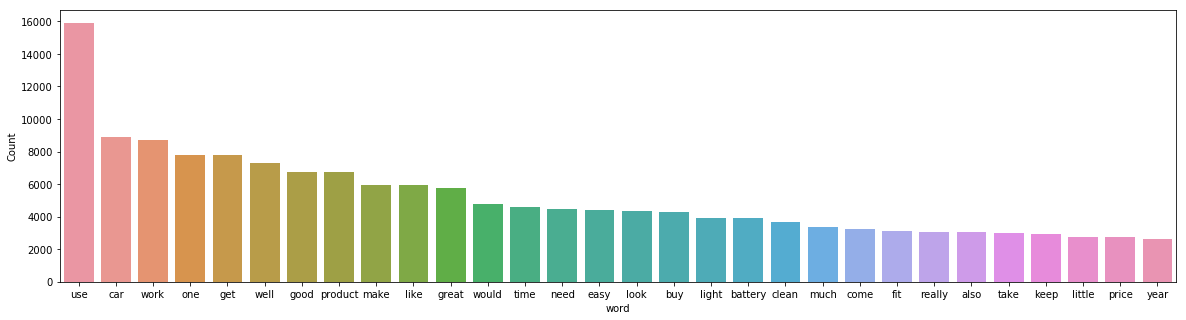

In [24]:
freq_words(reviews_SA['Review_clean'])